In [1]:
import numpy as np
from qiskit import *
%matplotlib inline

In [2]:
# We are going to study time evolution of a single qubit
# In order to do that we have to register just on qubit

q = QuantumRegister(1, 'q')

In [3]:
# Our circuit will therefore be

circ = QuantumCircuit(q)

In [4]:
# In order to time evolve our circuit, we have to make use of logic quantum gates
# In this part we are just simulating the NV center
# We should get the precession of the spin
# First we create our initial state

circ.h(q[0])

In [5]:
# The Larmor frequency
w=18.1 # (GHz)

# The times that are going to be considered
ti=0 # (ns)
tN=1 # (ns)
dt=0.005 # (ns)

# And create the time evolution program
while ti<tN:  
    t = ti + dt
    circ.u1(-w*dt,q[0]) 
    ti = t

[0.70710678+0.j         0.51759615+0.48176158j]


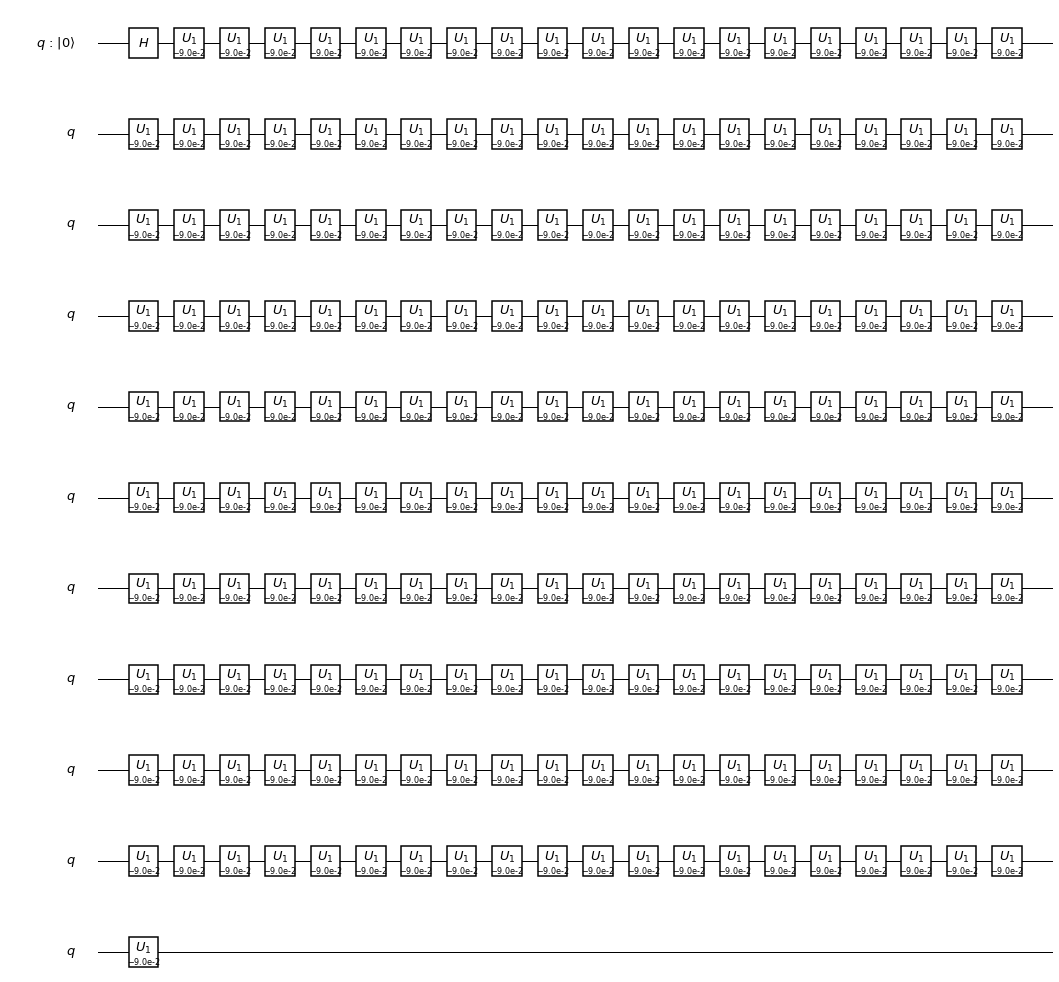

In [6]:
# Now we generate the results and print them

backend = BasicAer.get_backend('statevector_simulator')

job = execute(circ, backend)

result = job.result()

outputstate = result.get_statevector(circ)


print(outputstate)

circ.draw(output='mpl')

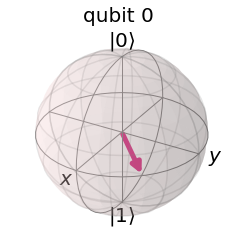

In [7]:
# To make things easy we are going to plot the results

from qiskit.visualization import plot_bloch_multivector

plot_bloch_multivector(outputstate)